## Numpy

In [25]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [26]:
import random

In [27]:
%%timeit
Tab = [random.randint(0,10000) + 1 for _ in range(10000)]

4.12 ms ± 42.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
%%timeit
npTab = np.random.rand(10000) + 1

42.6 µs ± 1.52 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [29]:
from math import sin, cos

In [30]:
%%timeit
sin_cos = [random.randint(0,100) for x in range(10000)]
for i, x in enumerate(sin_cos):
    sin_cos[i] = sin(x) + cos(x)

7.61 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [31]:
%%timeit
sin_cos = np.random.rand(10000)
sin_cos = np.sin(sin_cos) + np.cos(sin_cos)

147 µs ± 23.9 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [32]:
%%timeit
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

32.5 ns ± 6.67 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [33]:
%%timeit
def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

35.4 ns ± 8.31 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [34]:
%%timeit
def cube_sum(x):
    return np.power(x,3).sum()

44.2 ns ± 0.691 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [35]:
%%timeit
def almost_variance(x):
    return np.power(x-x.mean,4).mean

44.3 ns ± 1.23 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [36]:
tab = np.arange(1,11)
print(tab * tab.reshape(10,1))

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [37]:
def dist(d):
    return np.square(d.reshape(10,1,5) - d.reshape(1,10,5)).sum(-1)

def dist_py(d):
    res = np.zeros((len(d),len(d)))
    for i in range(len(d)):
        for j in range(len(d)):
            res[i][j] = np.square(d[i] - d[j]).sum()
    return res

In [38]:
data = np.random.rand(10,5)
assert np.allclose(dist(data), dist_py(data))

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [39]:
rand_arr = np.array([[0,1],[2,3],[4,5],[6,7],[8,9]])

def whiten_np(x):
    return(x - np.mean(x, axis=0) / np.std(x, axis=0))

print(whiten_np(rand_arr))
print(np.std(whiten_np(rand_arr), axis=0))
print(np.mean(whiten_np(rand_arr), axis=0))

[[-1.41421356 -0.76776695]
 [ 0.58578644  1.23223305]
 [ 2.58578644  3.23223305]
 [ 4.58578644  5.23223305]
 [ 6.58578644  7.23223305]]
[2.82842712 2.82842712]
[2.58578644 3.23223305]


### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [40]:
def closest(x, A):
    return A[np.argmin(np.abs(A-x))]

closest(1.5, np.array([1,-4,3]))

1

### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [41]:
def poly(x, a):
    return np.sum(np.cumprod(np.full_like(a,x))/x*a)

In [42]:
k = 10
x, a = np.random.rand(), np.random.rand(k)
assert np.isclose(poly(x,a),np.poly1d(a[::-1])(x)), f'{poly(x,a)} != {np.poly1d(a)(x)}'

## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

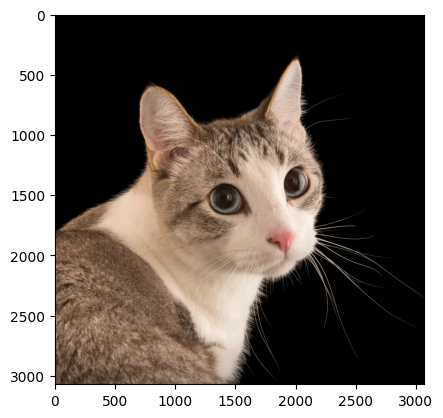

In [10]:
img = mpimg.imread('img.jpg')
plt.imshow(img)

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

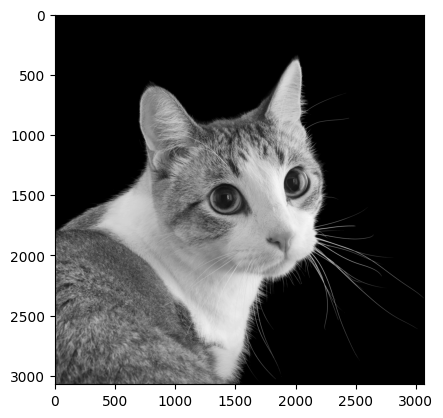

In [11]:
import numpy as np
from matplotlib import image, pyplot as plt

def grayscale(path_img):
    img = image.imread(path_img)
    gray = np.dot(img[...,:3], [0.2126, 0.7152, 0.0722])
    return gray

# Od razu pokazuje
def grayscale_show(path_img):
    img = image.imread(path_img)
    gray = np.dot(img[...,:3], [0.2126, 0.7152, 0.0722])
    plt.imshow(gray, cmap='gray')
    plt.show()

grayscale_show('img.jpg')


### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [46]:
def interpol(x1,x2,lambdas):
    lambdas = lambdas.reshape((len(lambdas),1))
    return x1*lambdas + (1-lambdas)*x2